In [123]:
import urllib.request
from bs4 import BeautifulSoup
import urllib
import os
import datetime
import time

In [124]:
TOP_URL = "https://weather.yahoo.co.jp/weather/"

html = urllib.request.urlopen(TOP_URL)

In [125]:
html.status

200

In [126]:
html.readlines()

[b'<!DOCTYPE html>\n',
 b'<html lang="ja">\n',
 b'<head>\n',
 b'        <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n',
 b'    <meta http-equiv="Content-Style-Type" content="text/css">\n',
 b'    <meta http-equiv="Content-Script-Type" content="text/javascript">\n',
 b'    <meta name="keywords" content="\xe5\xa4\xa9\xe6\xb0\x97\xe4\xba\x88\xe5\xa0\xb1,\xe5\x8f\xb0\xe9\xa2\xa8,\xe5\x9c\xb0\xe9\x9c\x87,\xe8\x8a\xb1\xe7\xb2\x89,\xe7\x86\xb1\xe4\xb8\xad\xe7\x97\x87,\xe8\xb1\xaa\xe9\x9b\xa8,\xe7\xa9\x8d\xe9\x9b\xaa">\n',
 b'    <meta name="description" content="\xe5\xa4\xa9\xe6\xb0\x97\xe4\xba\x88\xe5\xa0\xb1\xe3\x81\xaf\xe3\x82\x82\xe3\x81\xa1\xe3\x82\x8d\xe3\x82\x93\xe3\x80\x81\xe5\xa4\xa9\xe6\xb0\x97\xe3\x81\xab\xe9\x96\xa2\xe3\x81\x99\xe3\x82\x8b\xe3\x81\x82\xe3\x82\x89\xe3\x82\x86\xe3\x82\x8b\xe6\x83\x85\xe5\xa0\xb1\xe3\x83\xbb\xe7\x81\xbd\xe5\xae\xb3\xe6\x83\x85\xe5\xa0\xb1\xe3\x82\x92\xe8\xbf\x85\xe9\x80\x9f\xe3\x81\xab\xe3\x81\x8a\xe4\xbc\x9d\xe3\x81\x88\xe3\x

In [127]:
html = urllib.request.urlopen(TOP_URL)
soup = BeautifulSoup(html)

In [128]:
soup

<!DOCTYPE html>
<html lang="ja">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="天気予報,台風,地震,花粉,熱中症,豪雨,積雪" name="keywords"/>
<meta content="天気予報はもちろん、天気に関するあらゆる情報・災害情報を迅速にお伝えする天気・災害総合サイト。全国各地の雨雲の動きをリアルタイムにチェックできる「雨雲レーダー」や、花粉や熱中症、積雪情報など、季節ごとの天気情報も。" name="description"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="iBYp9hMgCq8ohmHKzOsNUzcnUgOQ5wKnxxSq38oi9r4=" name="verify-v1"/>
<meta content="5b21083452da6711" name="y_key"/>
<meta content="09700B0CFC6F46CBA1B128BA60D8CBC1" name="msvalidate.01"/>
<meta content="summary" name="twitter:card"/>
<meta content="@Yahoo_weather" name="twitter:site"/>
<meta content="@Yahoo_weather" name="twitter:creator"/>
<meta content="天気予報はもちろん、天気に関するあらゆる情報・災害情報を迅速にお伝えする天気・災害総合サイト。全国各地の雨雲の動きをリアルタイムにチェックできる「雨雲レーダー」や、花粉や熱中症、積雪情報など、季節ごとの天気情報も。" name="twitter:description"/>

In [129]:
li_kanto = soup.find("li", class_="point pt4410")
li_kanto

<li class="point pt4410">
<a class="rapidnofollow jsoff" data-ylk="slk:prefctr; pos:4;" href="/weather/jp/3.html?day=1">
<dl>
<dt class="name">東京</dt>
<dd class="forecast">
<p class="icon"><img alt="晴時々曇" src="https://s.yimg.jp/images/weather/general/next/size90/101_day.png"/></p>
<p class="temp"><em class="high">12</em>/<em class="low">2</em></p>
<p class="precip">10%</p>
</dd>
</dl>
</a>
<ul class="menuPref pt4410"></ul>
</li>

In [130]:
type(li_kanto)

bs4.element.Tag

In [131]:
endpoint = li_kanto.find("a").get("href")

In [132]:
endpoint

'/weather/jp/3.html?day=1'

In [133]:
url_kanto  = urllib.parse.urljoin(TOP_URL,endpoint)
url_kanto

'https://weather.yahoo.co.jp/weather/jp/3.html?day=1'

In [134]:
def get_soup_from_web(url:str) ->BeautifulSoup:
    time.sleep(3)
    html = urllib.request.urlopen(url)
    return BeautifulSoup(html)

soup_kanto = get_soup_from_web(url_kanto)

In [135]:
endpoint = soup_kanto.find("li", class_="point pt4410").find("a").get("href")
url_tokyoto = urllib.parse.urljoin(TOP_URL,endpoint)
soup_tokyoto = get_soup_from_web(url_tokyoto)

In [136]:
endpoint = soup_tokyoto.find("li", class_="point pt4410").find("a").get("href")
url_tokyo = urllib.parse.urljoin(url_tokyoto,endpoint)
soup_tokyo = get_soup_from_web(url_tokyo)

In [137]:
soup_tokyo

<!DOCTYPE html>
<html lang="ja">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="東京,東京,東京都,関東,天気予報,明日の天気,週間天気" name="keywords"/>
<meta content="東京（東京）の天気予報。今日・明日の天気と風と波、明日までの6時間ごとの降水確率と最高・最低気温を見られます。" name="description"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="summary" name="twitter:card"/>
<meta content="@Yahoo_weather" name="twitter:site"/>
<meta content="@Yahoo_weather" name="twitter:creator"/>
<meta content="東京（東京）の天気予報。今日・明日の天気と風と波、明日までの6時間ごとの降水確率と最高・最低気温を見られます。" name="twitter:description"/>
<meta content="weather.yahoo.co.jp" name="twitter:domain"/>
<meta content="Yahoo!天気" name="twitter:app:name:iphone"/>
<meta content="Yahoo!天気" name="twitter:app:name:ipad"/>
<meta content="Yahoo!天気" name="twitter:app:name:googleplay"/>
<meta content="" name="twitter:app:url:iphone"/>
<meta content

In [138]:
date = soup_tokyo.find("p",class_="date").text
date

'3月15日(日)'

In [139]:
date = datetime.datetime.now().date()
date

datetime.date(2020, 3, 15)

In [140]:
weather = soup_tokyo.find("p",class_="pict").text
weather

'晴時々曇'

In [141]:
high_temp = int(soup_tokyo.find("li", class_="high").find("em").text)
low_temp = int(soup_tokyo.find("li",class_="low").find("em").text)

In [142]:
high_temp

12

In [143]:
low_temp

2

In [144]:
def get_daily_weather_info():
    soup = get_soup_from_web(TOP_URL)
    li_kanto = soup.find("li", class_="point pt4410")
    endpoint = li_kanto.find("a").get("href")
    url_kanto  = urllib.parse.urljoin(TOP_URL,endpoint)
    soup_kanto = get_soup_from_web(url_kanto)
    
    endpoint = soup_kanto.find("li", class_="point pt4410").find("a").get("href")
    url_tokyoto = urllib.parse.urljoin(TOP_URL,endpoint)
    soup_tokyoto = get_soup_from_web(url_tokyoto)

    endpoint = soup_tokyoto.find("li", class_="point pt4410").find("a").get("href")
    url_tokyo = urllib.parse.urljoin(url_tokyoto,endpoint)
    soup_tokyo = get_soup_from_web(url_tokyo)

    date = datetime.datetime.now().date()
    weather = soup_tokyo.find("p",class_="pict").text
    high_temp = int(soup_tokyo.find("li", class_="high").find("em").text)
    low_temp = int(soup_tokyo.find("li",class_="low").find("em").text)
    return date, weather, high_temp, low_temp

In [145]:
get_daily_weather_info()

(datetime.date(2020, 3, 15), '晴時々曇', 12, 2)

In [146]:
import os
import pandas as pd
import sklearn
import csv
import datetime
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
!head data/weather_201301_201908_cleaned.csv

In [148]:
df = pd.read_csv("data/weather_201301_201908_cleaned.csv")

In [149]:
df.head()

,date,high_temp,low_temp,weather_am,weather_pm
0,2013/1/1,9.6,3.0,晴,快晴
1,2013/1/2,14.4,4.2,快晴,快晴
2,2013/1/3,9.9,1.8,曇時々晴,晴
3,2013/1/4,6.9,1.0,快晴,晴
4,2013/1/5,4.8,0.2,曇,薄曇後晴


In [150]:
%matplotlib inline

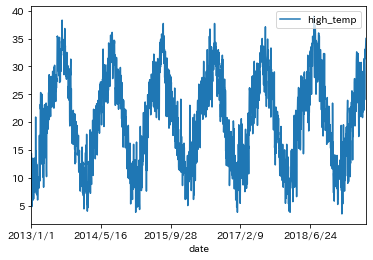

In [151]:
df.plot(x="date", y="high_temp")

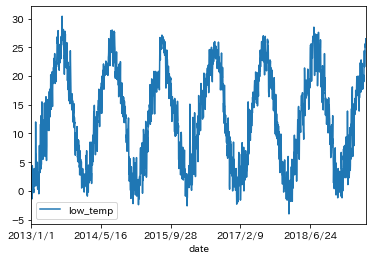

In [152]:
df.plot(x="date", y="low_temp")

In [153]:
set(df["weather_am"])

{'みぞれ一時曇後晴',
 'みぞれ一時雪、あられを伴う',
 'みぞれ時々雨',
 'みぞれ時々雪一時曇',
 'みぞれ時々雪後雨',
 '大雨',
 '大雨、雷を伴う',
 '大雨一時曇',
 '大雨後一時曇',
 '大雨後時々晴、みぞれを伴う',
 '大雨後時々曇',
 '大雨後晴',
 '大雨後晴時々曇',
 '大雨後曇',
 '大雨後薄曇、雷を伴う',
 '大雨後薄曇一時晴',
 '大雨時々曇',
 '大雨時々曇、雷を伴う',
 '大雪',
 '大雪一時曇',
 '快晴',
 '晴',
 '晴一時曇',
 '晴一時曇、雷を伴う',
 '晴一時曇後一時雨、雷を伴う',
 '晴一時曇後雨',
 '晴一時薄曇',
 '晴一時雨',
 '晴一時雨、雷を伴う',
 '晴一時雪',
 '晴後一時みぞれ、あられを伴う',
 '晴後一時曇',
 '晴後一時薄曇',
 '晴後一時雨',
 '晴後一時雨、雷を伴う',
 '晴後一時雨、雷・ひょうを伴う',
 '晴後時々曇',
 '晴後時々曇一時雨',
 '晴後時々薄曇',
 '晴後曇',
 '晴後曇一時雨',
 '晴後曇一時雨、雷を伴う',
 '晴後薄曇',
 '晴後雨一時曇',
 '晴後雨時々曇',
 '晴時々曇',
 '晴時々曇、みぞれを伴う',
 '晴時々曇、雷を伴う',
 '晴時々曇一時雨',
 '晴時々曇一時雨、雷を伴う',
 '晴時々曇一時雪',
 '晴時々曇後一時雨',
 '晴時々薄曇',
 '晴時々雨、雷を伴う',
 '曇',
 '曇、雷を伴う',
 '曇一時晴',
 '曇一時晴後一時雨',
 '曇一時晴後時々雨',
 '曇一時雨',
 '曇一時雨、雷を伴う',
 '曇一時雨後一時晴',
 '曇一時雨後時々晴',
 '曇一時雨後晴',
 '曇一時雨後晴、あられを伴う',
 '曇一時雨後晴、雷を伴う',
 '曇一時雪',
 '曇一時雪、あられを伴う',
 '曇一時雪後一時晴',
 '曇後一時大雨、雷を伴う',
 '曇後一時晴',
 '曇後一時雨',
 '曇後一時雨、雷を伴う',
 '曇後一時雨後晴',
 '曇後大雨',
 '曇後大雨、雷を伴う',
 '曇後時々晴',
 '曇後時々雨',
 '曇後晴',
 '曇後晴一時雨',
 '曇後雨',
 '曇時々みぞれ一時雨',
 '曇時々晴',
 '曇時々晴一時雨',
 '

In [154]:
df["weather_am_hare"] = df["weather_am"].apply(lambda x: 1 if "晴" in x else 0)
df["weather_pm_hare"] = df["weather_pm"].apply(lambda x: 1 if "晴" in x else 0)
df["weather_hare"] = (df["weather_am_hare"] + df["weather_pm_hare"]).apply(lambda x: 1 if x>0 else 0)
df["weather_hare"].mean()

0.7558236272878536

In [155]:
df["weather_am_kumori"] = df["weather_am"].apply(lambda x: 1 if "曇" in x else 0)
df["weather_pm_kumori"] = df["weather_pm"].apply(lambda x: 1 if "曇" in x else 0)
df["weather_kumori"] = (df["weather_am_kumori"] + df["weather_pm_kumori"]).apply(lambda x: 1 if x>0 else 0)
df["weather_kumori"].mean()

0.8552412645590682

In [156]:
df["weather_am_ame"] = df["weather_am"].apply(lambda x: 1 if "雨" in x else 0)
df["weather_pm_ame"] = df["weather_pm"].apply(lambda x: 1 if "雨" in x else 0)
df["weather_ame"] = (df["weather_am_ame"] + df["weather_pm_ame"]).apply(lambda x: 1 if x>0 else 0)
df["weather_ame"].mean()

0.41555740432612315

In [157]:
df["weather_am_yuki"] = df["weather_am"].apply(lambda x: 1 if "雪" in x else 0)
df["weather_pm_yuki"] = df["weather_pm"].apply(lambda x: 1 if "雪" in x else 0)
df["weather_yuki"] = (df["weather_am_yuki"] + df["weather_pm_yuki"]).apply(lambda x: 1 if x>0 else 0)
df["weather_yuki"].mean()

0.015391014975041598

In [158]:
df.dtypes

date                  object
high_temp            float64
low_temp             float64
weather_am            object
weather_pm            object
weather_am_hare        int64
weather_pm_hare        int64
weather_hare           int64
weather_am_kumori      int64
weather_pm_kumori      int64
weather_kumori         int64
weather_am_ame         int64
weather_pm_ame         int64
weather_ame            int64
weather_am_yuki        int64
weather_pm_yuki        int64
weather_yuki           int64
dtype: object

In [159]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month

In [160]:
df["month"]

0       1
1       1
2       1
3       1
4       1
       ..
2399    7
2400    7
2401    7
2402    7
2403    8
Name: month, Length: 2404, dtype: int64

In [161]:
df["date"]

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
2399   2019-07-28
2400   2019-07-29
2401   2019-07-30
2402   2019-07-31
2403   2019-08-01
Name: date, Length: 2404, dtype: datetime64[ns]

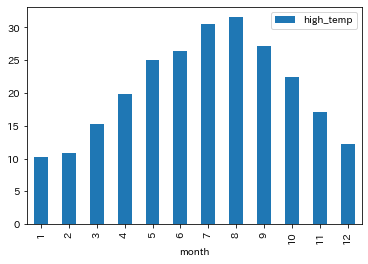

In [162]:
df.groupby("month").mean().plot.bar(y="high_temp")

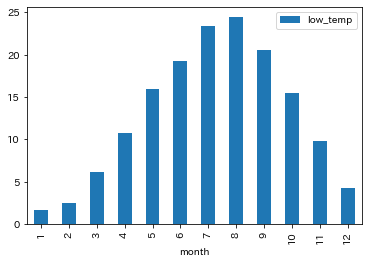

In [163]:
df.groupby("month").mean().plot.bar(y="low_temp")

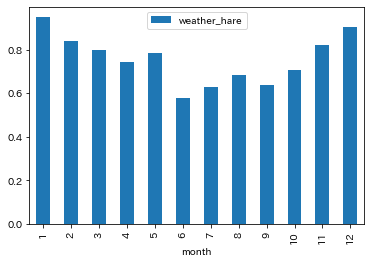

In [164]:
df.groupby("month").mean().plot.bar(y="weather_hare")

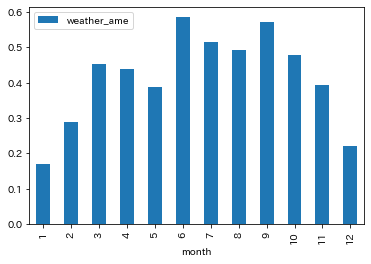

In [165]:
df.groupby("month").mean().plot.bar(y="weather_ame")

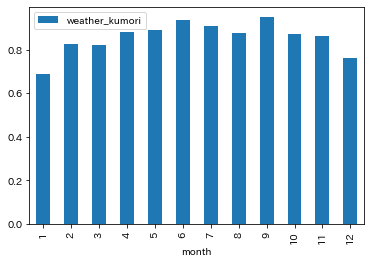

In [166]:
df.groupby("month").mean().plot.bar(y="weather_kumori")

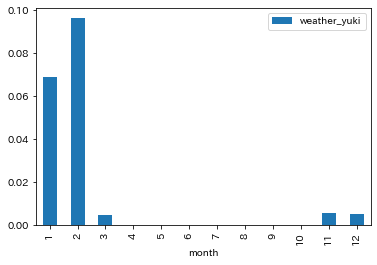

In [167]:
df.groupby("month").mean().plot.bar(y="weather_yuki")

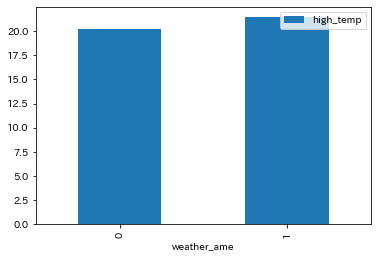

In [168]:
df.groupby("weather_ame").mean().plot.bar(y="high_temp")

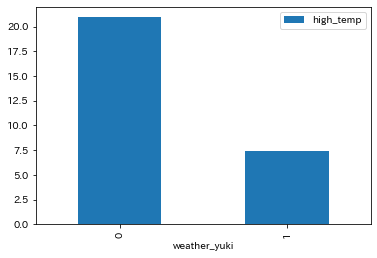

In [169]:
df.groupby("weather_yuki").mean().plot.bar(y="high_temp")

In [237]:
df["dayofyear"] = df["date"].dt.dayofyear
df["dayofyear"]

0         1
1         2
2         3
3         4
4         5
       ... 
2399    209
2400    210
2401    211
2402    212
2403    213
Name: dayofyear, Length: 2404, dtype: int64

In [238]:
df["week"] = df["date"].dt.week
df["month"] = df["date"].dt.month

In [240]:
df.loc[:, ["weather_hare","weather_kumori","weather_ame","weather_yuki"]]

,weather_hare,weather_kumori,weather_ame,weather_yuki
0,1,0,0,0
1,1,0,0,0
2,1,1,0,0
3,1,0,0,0
4,1,1,0,0
...,...,...,...,...
2399,1,1,1,0
2400,1,1,0,0
2401,1,1,0,0
2402,1,1,0,0


In [241]:
df.loc[:,["high_temp", "low_temp"]]

,high_temp,low_temp
0,9.6,3.0
1,14.4,4.2
2,9.9,1.8
3,6.9,1.0
4,4.8,0.2
...,...,...
2399,32.3,25.0
2400,33.7,25.3
2401,33.6,26.0
2402,34.6,26.5


In [242]:
df_tomorrow = df.copy()
df_tomorrow["date"] = df["date"] - datetime.timedelta(1)
df_tomorrow

,date,high_temp,low_temp,weather_am,weather_pm,weather_am_hare,weather_pm_hare,weather_hare,weather_am_kumori,weather_pm_kumori,weather_kumori,weather_am_ame,weather_pm_ame,weather_ame,weather_am_yuki,weather_pm_yuki,weather_yuki,month,dayofyear,week
0,2012-12-31,9.6,3.0,晴,快晴,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1
1,2013-01-01,14.4,4.2,快晴,快晴,1,1,1,0,0,0,0,0,0,0,0,0,1,2,1
2,2013-01-02,9.9,1.8,曇時々晴,晴,1,1,1,1,0,1,0,0,0,0,0,0,1,3,1
3,2013-01-03,6.9,1.0,快晴,晴,1,1,1,0,0,0,0,0,0,0,0,0,1,4,1
4,2013-01-04,4.8,0.2,曇,薄曇後晴,0,1,1,1,1,1,0,0,0,0,0,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,2019-07-27,32.3,25.0,晴時々曇一時雨,晴時々薄曇,1,1,1,1,1,1,1,0,1,0,0,0,7,209,30
2400,2019-07-28,33.7,25.3,晴一時曇,曇時々晴,1,1,1,1,1,1,0,0,0,0,0,0,7,210,31
2401,2019-07-29,33.6,26.0,晴後一時薄曇,晴一時薄曇,1,1,1,1,1,1,0,0,0,0,0,0,7,211,31
2402,2019-07-30,34.6,26.5,晴後薄曇,晴時々薄曇,1,1,1,1,1,1,0,0,0,0,0,0,7,212,31


In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
def set_target(target_col):
    df_tomorrow["target"] = df_tomorrow[target_col]
    return pd.merge(df, df_tomorrow.loc[:, ["date","target"]], how="left", on="date")
df_dm = set_target("low_temp")

In [245]:
df_tomorrow.loc[:,["date", "target"]]

,date,target
0,2012-12-31,3.0
1,2013-01-01,4.2
2,2013-01-02,1.8
3,2013-01-03,1.0
4,2013-01-04,0.2
...,...,...
2399,2019-07-27,25.0
2400,2019-07-28,25.3
2401,2019-07-29,26.0
2402,2019-07-30,26.5


In [246]:
df_dm.tail()

,date,high_temp,low_temp,weather_am,weather_pm,weather_am_hare,weather_pm_hare,weather_hare,weather_am_kumori,weather_pm_kumori,...,weather_am_ame,weather_pm_ame,weather_ame,weather_am_yuki,weather_pm_yuki,weather_yuki,month,dayofyear,week,target
2399,2019-07-28,32.3,25.0,晴時々曇一時雨,晴時々薄曇,1,1,1,1,1,...,1,0,1,0,0,0,7,209,30,25.3
2400,2019-07-29,33.7,25.3,晴一時曇,曇時々晴,1,1,1,1,1,...,0,0,0,0,0,0,7,210,31,26.0
2401,2019-07-30,33.6,26.0,晴後一時薄曇,晴一時薄曇,1,1,1,1,1,...,0,0,0,0,0,0,7,211,31,26.5
2402,2019-07-31,34.6,26.5,晴後薄曇,晴時々薄曇,1,1,1,1,1,...,0,0,0,0,0,0,7,212,31,26.3
2403,2019-08-01,35.0,26.3,晴,晴,1,1,1,0,0,...,0,0,0,0,0,0,8,213,31,NaN


In [247]:
X = df_dm[~df_dm["target"].isna()].loc[:,                           
        ["date",
        "high_temp",
         "low_temp",
         "weather_hare",
         "weather_kumori",
         "weather_ame",
         "weather_yuki",
         "month",
         "dayofyear",
         "week",
         "month"
        ]]

y = df_dm[~df_dm["target"].isna()]["target"]

In [248]:
X.head()

,date,high_temp,low_temp,weather_hare,weather_kumori,weather_ame,weather_yuki,month,dayofyear,week,month
0,2013-01-01,9.6,3.0,1,0,0,0,1,1,1,1
1,2013-01-02,14.4,4.2,1,0,0,0,1,2,1,1
2,2013-01-03,9.9,1.8,1,1,0,0,1,3,1,1
3,2013-01-04,6.9,1.0,1,0,0,0,1,4,1,1
4,2013-01-05,4.8,0.2,1,1,0,0,1,5,1,1


In [249]:
y

0        4.2
1        1.8
2        1.0
3        0.2
4       -1.4
        ... 
2398    25.0
2399    25.3
2400    26.0
2401    26.5
2402    26.3
Name: target, Length: 2403, dtype: float64

In [250]:
train_idx = (X["date"] < "2018-01-01")
val_idx    = (X["date"] >= "2018-01-01") & (X["date"] < "2019-01-01")
test_idx  = (X["date"] >= "2019-01-01")
train_idx

0        True
1        True
2        True
3        True
4        True
        ...  
2398    False
2399    False
2400    False
2401    False
2402    False
Name: date, Length: 2403, dtype: bool

In [251]:
X_train = X[train_idx].drop(columns="date")
y_train = y[train_idx]
X_val = X[val_idx].drop(columns="date")
y_val = y[val_idx]

In [252]:
X.shape

(2403, 11)

In [253]:
X_train.shape

(1826, 10)

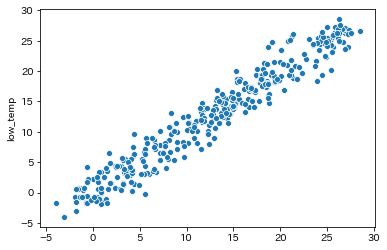

In [254]:
sns.scatterplot(y_val.values, X_val["low_temp"])

In [255]:
from sklearn.metrics import mean_squared_error

In [256]:
mean_squared_error(y_val.values, X_val["low_temp"])

3.9272054794520543

In [257]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg = LinearRegression().fit(X_train, y_train)
print("train_score", reg.score(X_train, y_train))
print("val_score", reg.score(X_val, y_val))

train_score 0.9507824492665277
val_score 0.9507104868340592


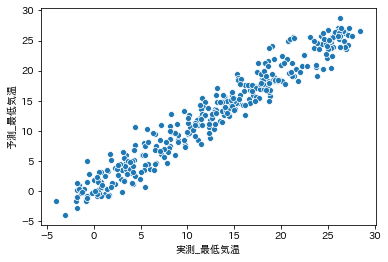

In [259]:
plt.xlabel("実測_最低気温")
plt.ylabel("予測_最低気温")
sns.scatterplot(y_val.values, reg.predict(X_val))

In [260]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val.values, reg.predict(X_val))

3.5792606232144064

In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
df_dm = set_target("weather_ame")

In [263]:
df_dm.head()

,date,high_temp,low_temp,weather_am,weather_pm,weather_am_hare,weather_pm_hare,weather_hare,weather_am_kumori,weather_pm_kumori,...,weather_am_ame,weather_pm_ame,weather_ame,weather_am_yuki,weather_pm_yuki,weather_yuki,month,dayofyear,week,target
0,2013-01-01,9.6,3.0,晴,快晴,1,1,1,0,0,...,0,0,0,0,0,0,1,1,1,0.0
1,2013-01-02,14.4,4.2,快晴,快晴,1,1,1,0,0,...,0,0,0,0,0,0,1,2,1,0.0
2,2013-01-03,9.9,1.8,曇時々晴,晴,1,1,1,1,0,...,0,0,0,0,0,0,1,3,1,0.0
3,2013-01-04,6.9,1.0,快晴,晴,1,1,1,0,0,...,0,0,0,0,0,0,1,4,1,0.0
4,2013-01-05,4.8,0.2,曇,薄曇後晴,0,1,1,1,1,...,0,0,0,0,0,0,1,5,1,0.0


In [264]:
X = df_dm[~df_dm["target"].isna()].loc[:,                           
        ["date",
        "high_temp",
         "low_temp",
         "weather_hare",
         "weather_kumori",
         "weather_ame",
         "weather_yuki",
         "month",
         "dayofyear",
         "week",
         "month"
        ]]

y = df_dm[~df_dm["target"].isna()]["target"]
train_idx = (X["date"] < "2018-01-01")
val_idx    = (X["date"] >= "2018-01-01")  & (X["date"] < "2019-01-01")
test_idx  = (X["date"] >= "2019-01-01")
X_train = X[train_idx].drop(columns="date")
y_train = y[train_idx]
X_val = X[val_idx].drop(columns="date")
y_val = y[val_idx]

In [265]:
reg = LogisticRegression().fit(X_train, y_train)

/Users/nobu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [266]:
reg.predict(X_val)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0.

In [268]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, X_val["weather_ame"])

0.6273972602739726

In [269]:
print("train accuracy:", accuracy_score(y_train, reg.predict(X_train)))
print("val accuracy:", accuracy_score(y_val, reg.predict(X_val)))

train accuracy: 0.6796276013143483
val accuracy: 0.6438356164383562
